In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import norm
from statsmodels.tsa.ar_model import AutoReg




# **1 Data cleaning**


In [3]:
df.columns = [name.split(' (#')[0] for name in df.columns]

In [4]:
df.rename(columns={"VISA 'A'":'VISA'},inplace=True)

In [5]:
#Rename the column name with date
df = df.rename(columns={'Name': 'Date'})


In [6]:
# If 'Code' can appear in any row, not just the first
df = df[~df.isin(['Code']).any(axis=1)]


In [7]:
#Set the date as index
df.set_index('Date', inplace=True)


In [9]:
#Verify if there is NaN
df.isnull().sum()

#There is no NaN


MASTERCARD           0
GOLDMAN SACHS GP.    0
AMERICAN EXPRESS     0
MORGAN STANLEY       0
VISA                 0
dtype: int64

In [10]:
# Verify that action price are float
print(df.dtypes)

#It's not so we need to convert 

MASTERCARD           object
GOLDMAN SACHS GP.    object
AMERICAN EXPRESS     object
MORGAN STANLEY       object
VISA                 object
dtype: object


In [8]:
#Convert in float
df['MASTERCARD'] = df['MASTERCARD'].astype(float)
df['GOLDMAN SACHS GP.'] = df['GOLDMAN SACHS GP.'].astype(float)
df['AMERICAN EXPRESS'] = df['AMERICAN EXPRESS'].astype(float)
df['MORGAN STANLEY'] = df['MORGAN STANLEY'].astype(float)
df["VISA"] = df["VISA"].astype(float)

# Verify again
print(df.dtypes)


MASTERCARD           float64
GOLDMAN SACHS GP.    float64
AMERICAN EXPRESS     float64
MORGAN STANLEY       float64
VISA                 float64
dtype: object


In [9]:
df

,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-01,83.5460,177.2600,90.73,31.36,55.6700
2014-01-02,83.4140,176.8900,89.45,31.03,55.2525
2014-01-03,83.0809,178.1500,89.74,31.51,55.2900
2014-01-06,82.6690,179.3700,89.70,31.62,54.9575
2014-01-07,83.7090,178.2900,89.36,31.52,55.3775
...,...,...,...,...,...
2024-01-29,440.5801,380.5601,200.86,87.62,273.6599
2024-01-30,445.1899,386.8701,204.15,87.62,277.1499
2024-01-31,449.2300,384.0100,200.74,87.24,273.2600


## Daily simple return


In [13]:
Daily_simple_return = df.pct_change() 
Daily_simple_return
#On remarque que la date 2014-01-01 comprend un NaN. Pour l'instant je garde comme ca



,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.001580,-0.002087,-0.014108,-0.010523,-0.007500
2014-01-03,-0.003993,0.007123,0.003242,0.015469,0.000679
2014-01-06,-0.004958,0.006848,-0.000446,0.003491,-0.006014
2014-01-07,0.012580,-0.006021,-0.003790,-0.003163,0.007642
...,...,...,...,...,...
2024-01-29,0.004675,0.007332,-0.002830,-0.001254,0.021348
2024-01-30,0.010463,0.016581,0.016380,0.000000,0.012753
2024-01-31,0.009075,-0.007393,-0.016703,-0.004337,-0.014035


In [14]:
# Replace NaN with the mean of each column
Daily_simple_return = Daily_simple_return.apply(lambda x: x.fillna(x.mean()), axis=0)
Daily_simple_return

,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-01,0.000790,0.000449,0.000488,0.000571,0.000726
2014-01-02,-0.001580,-0.002087,-0.014108,-0.010523,-0.007500
2014-01-03,-0.003993,0.007123,0.003242,0.015469,0.000679
2014-01-06,-0.004958,0.006848,-0.000446,0.003491,-0.006014
2014-01-07,0.012580,-0.006021,-0.003790,-0.003163,0.007642
...,...,...,...,...,...
2024-01-29,0.004675,0.007332,-0.002830,-0.001254,0.021348
2024-01-30,0.010463,0.016581,0.016380,0.000000,0.012753
2024-01-31,0.009075,-0.007393,-0.016703,-0.004337,-0.014035


In [15]:
# Calcul des statistiques descriptives
stats = Daily_simple_return.describe().transpose()
stats['mean'] *= 252  # Annualise la moyenne
stats['An Variance'] = Daily_simple_return.var() * 252
stats['skew'] = Daily_simple_return.skew()  # Add +3 to pass from excess kurtosis to kurtosis
stats['kurt'] = Daily_simple_return.kurtosis()+3  # Calcule le kurtosis pour chaque colonne

# Renommez les colonnes pour correspondre au tableau
stats.rename(columns={'std': 'An. Variance', '50%': 'median','skew' : 'Skewness', 'kurt': 'Kurtosis'}, inplace=True)

# Sélectionnez seulement les colonnes nécessaires pour correspondre au tableau
stats = stats[['mean', 'An Variance', 'Skewness', 'Kurtosis', 'min', 'max']]
stats


,mean,An Variance,Skewness,Kurtosis,min,max
MASTERCARD,0.199130,0.071449,0.313071,12.984982,-0.127255,0.166109
GOLDMAN SACHS GP.,0.113092,0.076216,0.122845,13.567385,-0.127053,0.175803
AMERICAN EXPRESS,0.122896,0.089319,1.156573,27.160107,-0.148187,0.218823
MORGAN STANLEY,0.143929,0.092106,0.402348,16.283060,-0.156000,0.197700
VISA,0.183053,0.058763,0.301065,13.465989,-0.135472,0.138426


Text(0, 0.5, 'Frequency')

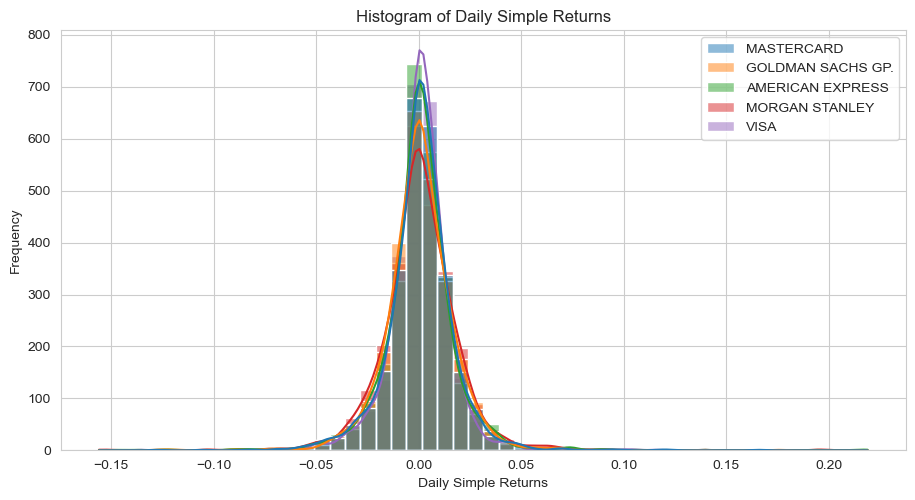

In [23]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

## Create Histograms and Scatter Plots for Daily Returns
plt.figure(figsize=(24, 12))

# Histogram for Daily Simple Returns
plt.subplot(2, 2, 1)
sns.histplot(Daily_simple_return, kde=True, color='skyblue', bins=50)
plt.title('Histogram of Daily Simple Returns')
plt.xlabel('Daily Simple Returns')
plt.ylabel('Frequency')


## Daily log return


In [16]:
import numpy as np

df = df.astype(float)

# Calculez les rendements logarithmiques quotidiens
Daily_log_return = np.log(df / df.shift(1))
Daily_log_return


,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.001581,-0.002090,-0.014208,-0.010579,-0.007528
2014-01-03,-0.004001,0.007098,0.003237,0.015350,0.000678
2014-01-06,-0.004970,0.006825,-0.000446,0.003485,-0.006032
2014-01-07,0.012502,-0.006039,-0.003798,-0.003168,0.007613
...,...,...,...,...,...
2024-01-29,0.004664,0.007306,-0.002834,-0.001255,0.021123
2024-01-30,0.010409,0.016445,0.016247,0.000000,0.012672
2024-01-31,0.009034,-0.007420,-0.016844,-0.004346,-0.014135


In [17]:
# Replace NaN with the mean of each column
Daily_log_return = Daily_log_return.apply(lambda x: x.fillna(x.mean()), axis=0)
Daily_log_return


,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-01,0.000649,0.000298,0.000312,0.000389,0.000610
2014-01-02,-0.001581,-0.002090,-0.014208,-0.010579,-0.007528
2014-01-03,-0.004001,0.007098,0.003237,0.015350,0.000678
2014-01-06,-0.004970,0.006825,-0.000446,0.003485,-0.006032
2014-01-07,0.012502,-0.006039,-0.003798,-0.003168,0.007613
...,...,...,...,...,...
2024-01-29,0.004664,0.007306,-0.002834,-0.001255,0.021123
2024-01-30,0.010409,0.016445,0.016247,0.000000,0.012672
2024-01-31,0.009034,-0.007420,-0.016844,-0.004346,-0.014135


In [17]:
# Calcul des statistiques descriptives
stats1 = Daily_log_return.describe().transpose()
stats1['mean'] *= 252  # Annualise la moyenne
stats1['An Variance'] = Daily_log_return.var() * 252
stats1['skew'] = Daily_log_return.skew()  # Calcule l'asymétrie pour chaque colonne
stats1['kurt'] = Daily_log_return.kurtosis()+3  # Calcule le kurtosis pour chaque colonne

stats1.rename(columns={ '50%': 'median','skew':'Skewness', 'kurt': 'Kurtosis'}, inplace=True)

stats1 = stats1[['mean', 'An Variance', 'Skewness', 'Kurtosis', 'min', 'max']]
stats1

,mean,An Variance,Skewness,Kurtosis,min,max
MASTERCARD,0.163445,0.071187,0.024730,12.208860,-0.136111,0.153673
GOLDMAN SACHS GP.,0.074971,0.076259,-0.195293,13.089427,-0.135881,0.161951
AMERICAN EXPRESS,0.078700,0.088001,0.510040,23.361222,-0.160388,0.197885
MORGAN STANLEY,0.097992,0.091765,-0.011685,15.195336,-0.169603,0.180403
VISA,0.153692,0.058571,0.021437,13.215013,-0.145571,0.129647


## Weekly simple return


In [18]:
weekly_returns = df.resample('W-MON').last().pct_change()
weekly_returns

,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-06,NaN,NaN,NaN,NaN,NaN
2014-01-13,-0.020189,-0.019457,-0.030212,-0.023719,-0.004231
2014-01-20,0.010395,0.002274,0.045752,0.081957,0.060667
2014-01-27,-0.070771,-0.065748,-0.057711,-0.102695,-0.068740
2014-02-03,-0.028139,-0.029571,-0.033364,-0.034034,-0.012719
...,...,...,...,...,...
2024-01-08,-0.010621,0.008010,0.009982,0.002788,0.008411
2024-01-15,0.016873,-0.028571,-0.037894,-0.040744,0.006208
2024-01-22,0.024819,0.021734,0.016315,-0.044259,0.026612


In [19]:
# Replace NaN with the mean of each column
weekly_returns = weekly_returns.apply(lambda x: x.fillna(x.mean()), axis=0)
weekly_returns

,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-06,0.003910,0.002232,0.002459,0.002846,0.003593
2014-01-13,-0.020189,-0.019457,-0.030212,-0.023719,-0.004231
2014-01-20,0.010395,0.002274,0.045752,0.081957,0.060667
2014-01-27,-0.070771,-0.065748,-0.057711,-0.102695,-0.068740
2014-02-03,-0.028139,-0.029571,-0.033364,-0.034034,-0.012719
...,...,...,...,...,...
2024-01-08,-0.010621,0.008010,0.009982,0.002788,0.008411
2024-01-15,0.016873,-0.028571,-0.037894,-0.040744,0.006208
2024-01-22,0.024819,0.021734,0.016315,-0.044259,0.026612


In [20]:
# Calcul des statistiques descriptives
stats2 = weekly_returns.describe().transpose()
stats2['mean'] *= 52  # Annualise la moyenne
stats2['An variance'] = weekly_returns.var()*52  # Convertit l'écart-type en volatilité annuelle
stats2['skew'] = weekly_returns.skew()  # Calcule l'asymétrie pour chaque colonne
stats2['kurt'] = weekly_returns.kurtosis()+3  # Calcule le kurtosis pour chaque colonne

stats2.rename(columns={'mean': 'An mean', '50%': 'median','skew': 'Skewness', 'kurt': 'Kurtosis'}, inplace=True)

stats2 = stats2[['An mean', 'An variance', 'Skewness', 'Kurtosis', 'min', 'max']]
stats2

,An mean,An variance,Skewness,Kurtosis,min,max
MASTERCARD,0.203329,0.066714,0.204128,9.689159,-0.145824,0.245696
GOLDMAN SACHS GP.,0.116048,0.079488,0.051843,5.532717,-0.175013,0.182633
AMERICAN EXPRESS,0.127894,0.092021,0.710730,12.917312,-0.196926,0.309020
MORGAN STANLEY,0.147984,0.094713,-0.028502,6.810231,-0.193201,0.252787
VISA,0.186818,0.053498,0.276378,9.220190,-0.117620,0.219758


## Weekly continuous return

In [22]:
weekly_log_returns = np.log(df.resample('W-MON').last()).diff()
weekly_log_returns

,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-06,NaN,NaN,NaN,NaN,NaN
2014-01-13,-0.020396,-0.019649,-0.030678,-0.024005,-0.004240
2014-01-20,0.010341,0.002272,0.044737,0.078771,0.058898
2014-01-27,-0.073400,-0.068009,-0.059444,-0.108359,-0.071217
2014-02-03,-0.028543,-0.030017,-0.033934,-0.034627,-0.012800
...,...,...,...,...,...
2024-01-08,-0.010678,0.007978,0.009932,0.002784,0.008376
2024-01-15,0.016732,-0.028987,-0.038631,-0.041598,0.006189
2024-01-22,0.024516,0.021501,0.016183,-0.045268,0.026264


In [23]:
weekly_log_returns = weekly_log_returns.apply(lambda x: x.fillna(x.mean()), axis=0)
weekly_log_returns

,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-06,0.003265,0.001466,0.001584,0.001930,0.003076
2014-01-13,-0.020396,-0.019649,-0.030678,-0.024005,-0.004240
2014-01-20,0.010341,0.002272,0.044737,0.078771,0.058898
2014-01-27,-0.073400,-0.068009,-0.059444,-0.108359,-0.071217
2014-02-03,-0.028543,-0.030017,-0.033934,-0.034627,-0.012800
...,...,...,...,...,...
2024-01-08,-0.010678,0.007978,0.009932,0.002784,0.008376
2024-01-15,0.016732,-0.028987,-0.038631,-0.041598,0.006189
2024-01-22,0.024516,0.021501,0.016183,-0.045268,0.026264


In [26]:
# Calcul des statistiques descriptives
stats3 = weekly_log_returns.describe().transpose()
stats3['mean'] *= 52  # Annualise la moyenne
stats3['An Variance'] = weekly_log_returns.var()*52  # Convertit l'écart-type en volatilité annuelle
stats3['skew'] = weekly_log_returns.skew()  # Calcule l'asymétrie pour chaque colonne
stats3['kurt'] = weekly_log_returns.kurtosis()+3  # Calcule le kurtosis pour chaque colonne

# Renommez les colonnes pour correspondre au tableau
stats3.rename(columns={'mean': 'An mean', '50%': 'median','skew': 'Skewness', 'kurt': 'Kurtosis'}, inplace=True)

# Sélectionnez seulement les colonnes nécessaires pour correspondre au tableau
stats3 = stats3[['An mean', 'An Variance', 'Skewness', 'Kurtosis', 'min', 'max']]
stats3

,An mean,An Variance,Skewness,Kurtosis,min,max
MASTERCARD,0.169805,0.066388,-0.216941,8.519210,-0.157618,0.219694
GOLDMAN SACHS GP.,0.076240,0.079552,-0.211651,5.586048,-0.192388,0.167743
AMERICAN EXPRESS,0.082389,0.090515,0.060662,10.946017,-0.219308,0.269279
MORGAN STANLEY,0.100364,0.095287,-0.383270,6.600389,-0.214681,0.225370
VISA,0.159965,0.053059,-0.080386,8.104695,-0.125132,0.198653


Text(0, 0.5, 'Frequency')

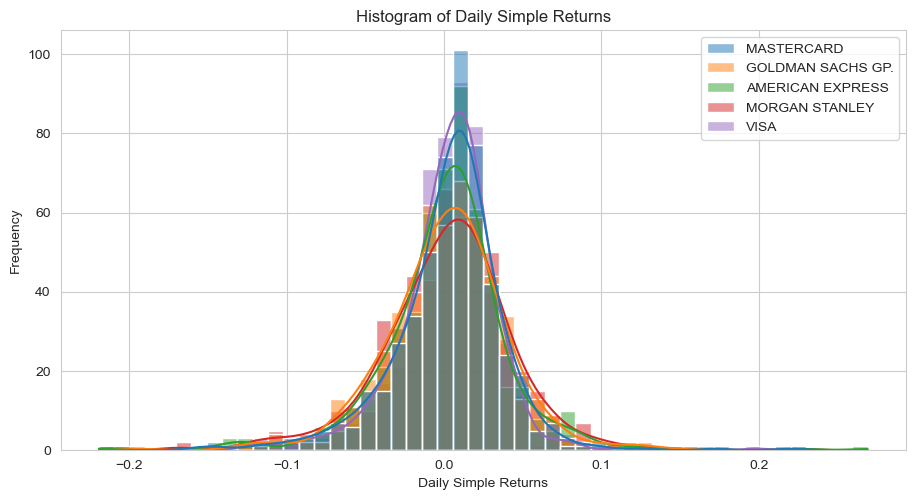

In [29]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

## Create Histograms and Scatter Plots for Daily Returns
plt.figure(figsize=(24, 12))

# Histogram for Daily Simple Returns
plt.subplot(2, 2, 1)
sns.histplot(weekly_log_returns, kde=True, color='skyblue', bins=50)
plt.title('Histogram of Daily Simple Returns')
plt.xlabel('Daily Simple Returns')
plt.ylabel('Frequency')


# **2 Stationarity**


In [30]:
from statsmodels.tsa.stattools import adfuller


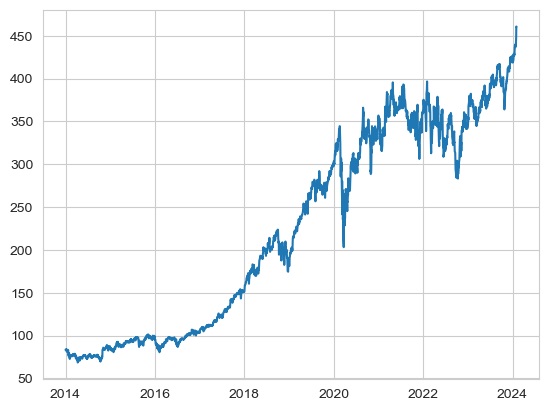

In [28]:
plt.plot(df['MASTERCARD'])
#Non-Stationary Time Series: A non-stationary time series, on the other hand, displays changes in statistical
#properties over time
#often due to the presence of trends, seasonality, or other underlying patterns.
#When you plot a non-stationary time series, you'll typically observe:

In [31]:
x = df['MASTERCARD'].values
result = adfuller(x)
print('ADF Statistic : %f' % result[0])
print('p-value : %f' % result[1])
print('Critical Values :')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))
    
if result[0] < result[4]["5%"]:
    print("Reject H0 - Time series is stationnary")
else:
    print("Failed to reject Ho- Time serie is non stationnary")

ADF Statistic : 0.126518
p-value : 0.967826
Critical Values :
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to reject Ho- Time serie is non stationnary


In [32]:
# Function to run the ADF test on a series
def run_adf_test(series, title):
    result = adfuller(series.dropna())
    print(f'Results for {title}:')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    # Interpretation based on p-value
    if result[1] < 0.05:
        print("The series is likely stationary.")
    else:
        print("The series is likely non-stationary.")
    print('\n')

# Compute log prices
df_log_prices = np.log(df)

# Applying the ADF test to each column in the DataFrame of log prices
for column in df_log_prices.columns:
    run_adf_test(df_log_prices[column], column)


Results for MASTERCARD:
ADF Statistic: -0.488327
p-value: 0.894274
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
The series is likely non-stationary.


Results for GOLDMAN SACHS GP.:
ADF Statistic: -1.315668
p-value: 0.621974
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
The series is likely non-stationary.


Results for AMERICAN EXPRESS:
ADF Statistic: -0.672623
p-value: 0.853714
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
The series is likely non-stationary.


Results for MORGAN STANLEY:
ADF Statistic: -1.226907
p-value: 0.661915
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
The series is likely non-stationary.


Results for VISA:
ADF Statistic: -0.764901
p-value: 0.829216
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
The series is likely non-stationary.




In [77]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller




ADF Statistic: -14.234344
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
La série est stationnaire.


# **2.1 Critical Values**


In [46]:
# Réinitialisons les paramètres pour la démonstration
N = 10000  # Nombre de réplications pour la démonstration (N=10,000 pour l'analyse réelle)
T = 100  # Longueur de la série temporelle
initial_price = 0

# Initialisons une liste pour stocker les statistiques de test de chaque réplication
test_statistics = []

# Répétons le processus pour le nombre démo de réplications
for i in range(N):
    # Étape 1: Simuler une série temporelle de T termes d'erreur
    error_terms = np.random.normal(0, 1, T)
    
    # Étape 2: Calculer une série temporelle de prix
    prices = [initial_price]
    for t in range(1, T):
        prices.append(prices[t-1] + error_terms[t])
    prices_series = pd.Series(prices)
    
    # Étape 3: Estimer le modèle AR(1)
    ar_model = AutoReg(prices_series, lags=1)
    ar_results = ar_model.fit()
    
    # Étape 4: Calculer la statistique de test
    phi_estimate = ar_results.params[1]  # Coefficient autorégressif phi
    test_statistic = (phi_estimate - 1) / ar_results.bse[1]
    
    # Ajouter la statistique de test à la liste
    test_statistics.append(test_statistic)
    
    #Ce code ci nous donne les quantiles du test de DF ajusté a 10000 estimations ce qui permet d'augmenter la précision.

# Convertissons la liste des statistiques de test en une série pandas pour faciliter l'analyse
test_statistics_series = pd.Series(test_statistics)

# Calculons les quantiles pour les niveaux de significativité de 10%, 5% et 1%
quantiles = test_statistics_series.quantile([0.1, 0.05, 0.01])

# Affichons les valeurs des quantiles calculés
quantiles

0.10   -2.621962
0.05   -2.936158
0.01   -3.553745
dtype: float64

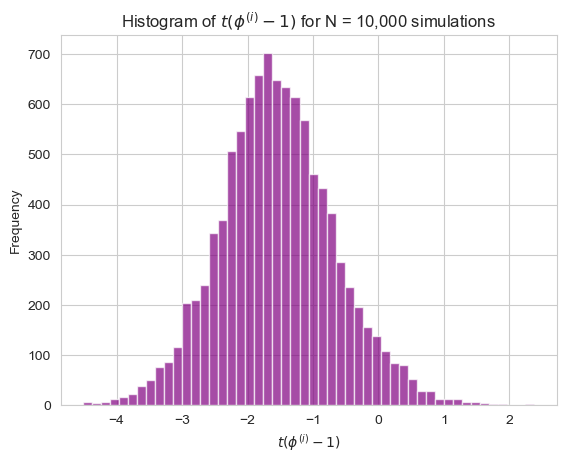

In [44]:
# Plotting the histogram of the test statistics
plt.hist(test_statistics, bins=50, alpha=0.7, color='purple')
plt.title('Histogram of $t(\\phi^{(i)} - 1)$ for N = 10,000 simulations')
plt.xlabel('$t(\\phi^{(i)} - 1)$')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [166]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import t as t_dist

# Paramètres de simulation
n_simulations = 10000  # nombre de simulations
T = 100  # taille de l'échantillon pour chaque simulation
phi = 0.2  # le vrai paramètre phi dans le modèle AR(1)
t_statistics = []

for i in range(n_simulations):
    # Simuler un bruit blanc
    epsilon = np.random.normal(0, 1, T)
    
    # Initialiser la série temporelle
    p = np.zeros(T)
    
    # Générer les données AR(1)
    for t in range(1, T):
        p[t] = phi * p[t-1] + epsilon[t]
    
    # Ajuster le modèle AR(1) aux données simulées avec AutoReg
    model = sm.tsa.AutoReg(p, lags=1).fit()
    
    # Calculer la statistique de test (t-statistique)
    phi_hat = model.params[1]  # estimation de phi
    se = model.bse[1]  # écart-type de l'estimation de phi
    t_stat = (phi_hat - 1) / se
    t_statistics.append(t_stat)

# Calculer la distribution des statistiques t
t_distribution = np.array(t_statistics)



array([-7.17098013, -9.02813456, -8.08532603, ..., -8.69320448,
       -8.56017455, -7.4312536 ])

In [167]:
#Ce code ci nous donne les quantiles du test de DF ajusté a 10000 estimations ce qui permet d'augmenter la précision.

# Convertissons la liste des statistiques de test en une série pandas pour faciliter l'analyse
t_statistics_series = pd.Series(t_statistics)

# Calculons les quantiles pour les niveaux de significativité de 10%, 5% et 1%
quantiles = t_statistics_series.quantile([0.1, 0.05, 0.01])

# Affichons les valeurs des quantiles calculés
quantiles

0.10    -9.361027
0.05    -9.731992
0.01   -10.458681
dtype: float64

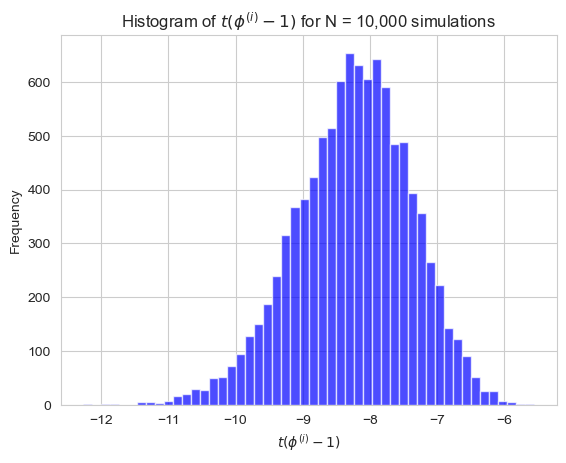

In [168]:
# Plotting the histogram of the test statistics
plt.hist(t_statistics, bins=50, alpha=0.7, color='blue')
plt.title('Histogram of $t(\\phi^{(i)} - 1)$ for N = 10,000 simulations')
plt.xlabel('$t(\\phi^{(i)} - 1)$')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [48]:
# Réinitialisons les paramètres pour la démonstration
N = 10000  # Nombre de réplications pour la démonstration (N=10,000 pour l'analyse réelle)
T = 500  # Longueur de la série temporelle

# Initialisons une liste pour stocker les statistiques de test de chaque réplication
test_statistics = []

# Répétons le processus pour le nombre démo de réplications
for i in range(N):
    # Étape 1: Simuler une série temporelle de T termes d'erreur
    error_terms = np.random.normal(0, 1, T)
    
    # Étape 2: Calculer une série temporelle de prix
    prices = [initial_price]
    for t in range(1, T):
        prices.append(prices[t-1] + error_terms[t])
    prices_series = pd.Series(prices)
    
    # Étape 3: Estimer le modèle AR(1)
    ar_model = AutoReg(prices_series, lags=1)
    ar_results = ar_model.fit()
    
    # Étape 4: Calculer la statistique de test
    phi_estimate = ar_results.params[1]  # Coefficient autorégressif phi
    test_statistic = (phi_estimate - 1) / ar_results.bse[1]
    
    # Ajouter la statistique de test à la liste
    test_statistics.append(test_statistic)
    
    #Ce code ci nous donne les quantiles du test de DF ajusté a 10000 estimations ce qui permet d'augmenter la précision.

# Convertissons la liste des statistiques de test en une série pandas pour faciliter l'analyse
test_statistics_series = pd.Series(test_statistics)

# Calculons les quantiles pour les niveaux de significativité de 10%, 5% et 1%
quantiles = test_statistics_series.quantile([0.1, 0.05, 0.01])

# Affichons les valeurs des quantiles calculés
quantiles

0.10   -2.574151
0.05   -2.879223
0.01   -3.422783
dtype: float64

In [49]:
df

,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-01,83.5460,177.2600,90.73,31.36,55.6700
2014-01-02,83.4140,176.8900,89.45,31.03,55.2525
2014-01-03,83.0809,178.1500,89.74,31.51,55.2900
2014-01-06,82.6690,179.3700,89.70,31.62,54.9575
2014-01-07,83.7090,178.2900,89.36,31.52,55.3775
...,...,...,...,...,...
2024-01-29,440.5801,380.5601,200.86,87.62,273.6599
2024-01-30,445.1899,386.8701,204.15,87.62,277.1499
2024-01-31,449.2300,384.0100,200.74,87.24,273.2600


In [18]:
df

,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-01,83.5460,177.2600,90.73,31.36,55.6700
2014-01-02,83.4140,176.8900,89.45,31.03,55.2525
2014-01-03,83.0809,178.1500,89.74,31.51,55.2900
2014-01-06,82.6690,179.3700,89.70,31.62,54.9575
2014-01-07,83.7090,178.2900,89.36,31.52,55.3775
...,...,...,...,...,...
2024-01-29,440.5801,380.5601,200.86,87.62,273.6599
2024-01-30,445.1899,386.8701,204.15,87.62,277.1499
2024-01-31,449.2300,384.0100,200.74,87.24,273.2600


In [15]:


returns = np.log(df/df.shift(1)).dropna()
log_prices = np.log(df)


In [19]:
#Copy code from last year project

OLS_MA = sm.OLS(returns['MASTERCARD'].values, sm.add_constant(log_prices['MASTERCARD'][:-1].values)).fit()
OLS_GS = sm.OLS(returns['GOLDMAN SACHS GP.'].values, sm.add_constant(log_prices['GOLDMAN SACHS GP.'][:-1].values)).fit()
OLS_AXP = sm.OLS(returns['AMERICAN EXPRESS'].values, sm.add_constant(log_prices['AMERICAN EXPRESS'][:-1].values)).fit()
OLS_MS = sm.OLS(returns['MORGAN STANLEY'].values, sm.add_constant(log_prices['MORGAN STANLEY'][:-1].values)).fit()
OLS_V = sm.OLS(returns['VISA'].values, sm.add_constant(log_prices['VISA'][:-1].values)).fit()

coeffMA = np.array([OLS_MA.params[1:], OLS_MA.tvalues[1:], OLS_MA.pvalues[1:], OLS_MA.tvalues[1:]<-2.54])
coeffGS = np.array([OLS_GS.params[1:], OLS_GS.tvalues[1:], OLS_GS.pvalues[1:], OLS_GS.tvalues[1:]<-2.54])
coeffAXP = np.array([OLS_AXP.params[1:], OLS_AXP.tvalues[1:], OLS_AXP.pvalues[1:], OLS_AXP.tvalues[1:]<-2.54])
coeffMS = np.array([OLS_MS.params[1:], OLS_MS.tvalues[1:], OLS_MS.pvalues[1:], OLS_MS.tvalues[1:]<-2.54])
coeffV = np.array([OLS_V.params[1:], OLS_V.tvalues[1:], OLS_V.pvalues[1:], OLS_V.tvalues[1:]<-2.54])

DF = np.hstack((coeffMA, coeffGS, coeffAXP, coeffMS, coeffV))
DF = pd.DataFrame(DF, columns=['MA', 'GS', 'AXP', 'MS', 'V'], index=['ϕ-1', 't-value', 'p-value', 'reject H_0 = 1'])
print(DF)



                      MA        GS       AXP        MS         V
ϕ-1            -0.000345 -0.001460 -0.000931 -0.001030 -0.000565
t-value        -0.632951 -1.233757 -0.826271 -1.131419 -0.967781
p-value         0.526821  0.217404  0.408725  0.257982  0.333243
reject H_0 = 1  0.000000  0.000000  0.000000  0.000000  0.000000


In [18]:
#Le plus efficient, modifier N a 10000 pour avoir reéponse adapté

import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import OLS

# Nombre de simulations et taille d'échantillon
N = 1000  # Nombre de simulations pour obtenir la distribution des statistiques t
T = 100  # Taille de l'échantillon de chaque série temporelle

# Initialisation d'une liste pour stocker les statistiques t
t_stats = []

# Simulation N fois
for _ in range(N):
    # Génération des marches aléatoires
    pA = np.cumsum(np.random.normal(size=T))
    pB = np.cumsum(np.random.normal(size=T))
    
    # Estimation de la relation linéaire
    pB = sm.add_constant(pB)  # Ajout d'une constante pour l'intercept
    model = OLS(pA, pB).fit()  # Régression OLS de pA sur pB
    residuals = model.resid  # Résidus de la régression
    
    # Test de Dickey-Fuller sur les résidus
    adf_test = adfuller(residuals)
    
    # Estimation d'un modèle AR(1) sur les résidus
    lagged_residuals = sm.add_constant(np.roll(residuals, 1))  # Ajout de la constante et lag
    model_ar1 = OLS(residuals[1:], lagged_residuals[1:]).fit()  # Régression OLS des résidus sur leur propre lag
    phi_hat = model_ar1.params[1]  # Coefficient estimé pour le lag
    se = model_ar1.bse[1]  # Erreur standard du coefficient
    t_stat = (phi_hat - 1) / se  # Statistique t pour le coefficient phi
    t_stats.append(t_stat)  # Stockage de la statistique t

# Calcul des valeurs critiques basées sur les quantiles des statistiques t
critical_values = {
    '1%': np.quantile(t_stats, 0.01),
    '5%': np.quantile(t_stats, 0.05),
    '10%': np.quantile(t_stats, 0.10)
}

# Afficher les valeurs critiques
print("Valeurs critiques basées sur les simulations:")
for key, value in critical_values.items():
    print(f"{key} : {value}")


Valeurs critiques basées sur les simulations:
1% : -3.9332525384628716
5% : -3.3723485183765693
10% : -3.054691076671155


In [63]:
# Nombre de simulations et taille d'échantillon
N = 1000  # Nombre de simulations pour obtenir la distribution des statistiques t
T = 500  # Taille de l'échantillon de chaque série temporelle

# Initialisation d'une liste pour stocker les statistiques t
t_stats = []

# Simulation N fois
for _ in range(N):
    # Génération des marches aléatoires
    pA = np.cumsum(np.random.normal(size=T))
    pB = np.cumsum(np.random.normal(size=T))
    
    # Estimation de la relation linéaire
    pB = sm.add_constant(pB)  # Ajout d'une constante pour l'intercept
    model = OLS(pA, pB).fit()  # Régression OLS de pA sur pB
    residuals = model.resid  # Résidus de la régression
    
    # Test de Dickey-Fuller sur les résidus
    adf_test = adfuller(residuals)
    
    # Estimation d'un modèle AR(1) sur les résidus
    lagged_residuals = sm.add_constant(np.roll(residuals, 1))  # Ajout de la constante et lag
    model_ar1 = OLS(residuals[1:], lagged_residuals[1:]).fit()  # Régression OLS des résidus sur leur propre lag
    phi_hat = model_ar1.params[1]  # Coefficient estimé pour le lag
    se = model_ar1.bse[1]  # Erreur standard du coefficient
    t_stat = (phi_hat - 1) / se  # Statistique t pour le coefficient phi
    t_stats.append(t_stat)  # Stockage de la statistique t

# Calcul des valeurs critiques basées sur les quantiles des statistiques t
critical_values = {
    '1%': np.quantile(t_stats, 0.01),
    '5%': np.quantile(t_stats, 0.05),
    '10%': np.quantile(t_stats, 0.10)
}

# Afficher les valeurs critiques
print("Valeurs critiques basées sur les simulations:")
for key, value in critical_values.items():
    print(f"{key} : {value}")


Valeurs critiques basées sur les simulations:
1% : -3.899424159740727
5% : -3.4122219773338616
10% : -3.1095015003903654


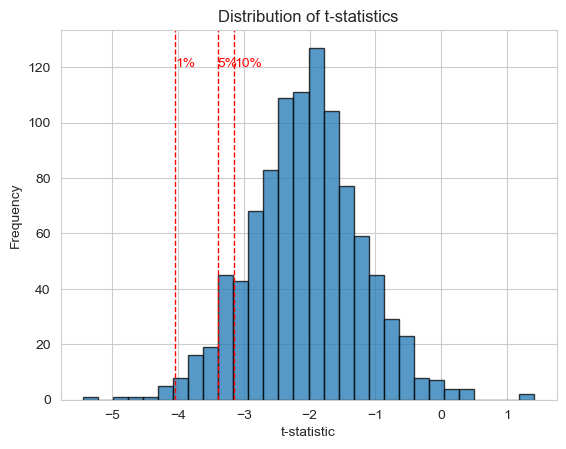

Valeurs critiques pour la distribution simulée des statistiques t:
1%: -4.037308770548395
5%: -3.3979055371829823
10%: -3.145622754304333


In [182]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que t_stats est une liste contenant les statistiques t de vos simulations

# Calcul des valeurs critiques
critical_values = {
    '1%': np.quantile(t_stats, 0.01),
    '5%': np.quantile(t_stats, 0.05),
    '10%': np.quantile(t_stats, 0.10)
}

# Tracer l'histogramme
plt.hist(t_stats, bins=30, edgecolor='black', alpha=0.75)

# Marquer les valeurs critiques sur l'histogramme
for key, value in critical_values.items():
    plt.axvline(value, color='red', linestyle='dashed', linewidth=1)
    plt.text(value, plt.ylim()[1] * 0.9, f'{key}', color='red')

# Ajouter des titres et des étiquettes
plt.title('Distribution of t-statistics')
plt.xlabel('t-statistic')
plt.ylabel('Frequency')

# Afficher le graphique
plt.show()

# Rapporter les valeurs critiques
print("Valeurs critiques pour la distribution simulée des statistiques t:")
for key, value in critical_values.items():
    print(f"{key}: {value}")


In [21]:
import statistics as stats
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint
import scipy.optimize as spop
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf

In [23]:
coint_cv_10 = np.quantile(tstat_zt_sorted, 0.1)
coint_cv_5 = np.quantile(tstat_zt_sorted, 0.05)
coint_cv_1 = np.quantile(tstat_zt_sorted, 0.01)

print('Cointegration critical values for T=500:')
print(f'10%: {coint_cv_10:.2f}')
print(f'5%: {coint_cv_5:.2f}')
print(f'1%: {coint_cv_1:.2f}')


coint_critical_values = pd.DataFrame({'1%': [coint_cv_1],
                                '5%': [coint_cv_5],
                                '10%': [coint_cv_10]},
                               index=['Cointegration critical Values T=500'])
print(coint_critical_values)


Cointegration critical values for T=500:
10%: -3.05
5%: -3.36
1%: -3.97
                                           1%        5%       10%
Cointegration critical Values T=500 -3.971084 -3.361559 -3.048999


In [25]:
df

,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-01,83.5460,177.2600,90.73,31.36,55.6700
2014-01-02,83.4140,176.8900,89.45,31.03,55.2525
2014-01-03,83.0809,178.1500,89.74,31.51,55.2900
2014-01-06,82.6690,179.3700,89.70,31.62,54.9575
2014-01-07,83.7090,178.2900,89.36,31.52,55.3775
...,...,...,...,...,...
2024-01-29,440.5801,380.5601,200.86,87.62,273.6599
2024-01-30,445.1899,386.8701,204.15,87.62,277.1499
2024-01-31,449.2300,384.0100,200.74,87.24,273.2600


In [28]:
from statsmodels.tsa.stattools import coint

def coint_test(y0, y1):
    coint_t, p_value, _ = coint(y0, y1)
    return {'coint_t': coint_t, 'p_value': p_value}


In [29]:
print(coint_test(log_prices['MASTERCARD'].values, log_prices['GOLDMAN SACHS GP.'].values))
print(coint_test(log_prices['MASTERCARD'].values,log_prices['AMERICAN EXPRESS'].values))
print(coint_test(log_prices['MASTERCARD'].values,log_prices['MORGAN STANLEY'].values))
print(coint_test(log_prices['MASTERCARD'].values,log_prices['VISA'].values))

print(coint_test(log_prices['GOLDMAN SACHS GP.'].values,log_prices['MASTERCARD'].values))
print(coint_test(log_prices['GOLDMAN SACHS GP.'].values,log_prices['AMERICAN EXPRESS'].values))
print(coint_test(log_prices['GOLDMAN SACHS GP.'].values,log_prices['MORGAN STANLEY'].values))
print(coint_test(log_prices['GOLDMAN SACHS GP.'].values,log_prices['VISA'].values))

print(coint_test(log_prices['AMERICAN EXPRESS'].values,log_prices['MASTERCARD'].values))
print(coint_test(log_prices['AMERICAN EXPRESS'].values,log_prices['GOLDMAN SACHS GP.'].values))
print(coint_test(log_prices['AMERICAN EXPRESS'].values,log_prices['MORGAN STANLEY'].values))
print(coint_test(log_prices['AMERICAN EXPRESS'].values,log_prices['VISA'].values))

print(coint_test(log_prices['MORGAN STANLEY'].values,log_prices['MASTERCARD'].values))
print(coint_test(log_prices['MORGAN STANLEY'].values,log_prices['GOLDMAN SACHS GP.'].values))
print(coint_test(log_prices['MORGAN STANLEY'].values,log_prices['AMERICAN EXPRESS'].values))
print(coint_test(log_prices['MORGAN STANLEY'].values,log_prices['VISA'].values))

print(coint_test(log_prices['VISA'].values,log_prices['MASTERCARD'].values))
print(coint_test(log_prices['VISA'].values,log_prices['GOLDMAN SACHS GP.'].values))
print(coint_test(log_prices['VISA'].values,log_prices['AMERICAN EXPRESS'].values))
print(coint_test(log_prices['VISA'].values,log_prices['MORGAN STANLEY'].values))


{'coint_t': -1.7350056150904285, 'p_value': 0.6607215424125795}
{'coint_t': -2.1220072471569007, 'p_value': 0.4648699154330435}
{'coint_t': -1.6201086709482764, 'p_value': 0.7123280899849064}
{'coint_t': -3.765708472964147, 'p_value': 0.015050759288706774}
{'coint_t': -2.0405656803850905, 'p_value': 0.5074374277559789}
{'coint_t': -2.4826383846368674, 'p_value': 0.28677924642226416}
{'coint_t': -3.4032892492880245, 'p_value': 0.04198644678837439}
{'coint_t': -2.096977509678474, 'p_value': 0.47794723890613994}
{'coint_t': -1.987466003576739, 'p_value': 0.5350869870460553}
{'coint_t': -2.2321285216854965, 'p_value': 0.40786264868100164}
{'coint_t': -2.0098816380948077, 'p_value': 0.5234377323337983}
{'coint_t': -1.9695307033372076, 'p_value': 0.5443754883839832}
{'coint_t': -1.9773428905506445, 'p_value': 0.5403335895833664}
{'coint_t': -3.3749826835908494, 'p_value': 0.04520610087490975}
{'coint_t': -2.404115651979877, 'p_value': 0.32290818995778936}
{'coint_t': -1.8332412771482598, 'p_

In [74]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools

# Convertir les prix en log-prix
log_prices = np.log(df)


# Préparer les paires d'actifs
assets = log_prices.columns
pairs = list(itertools.combinations(assets, 2))

# Fonction pour le test de cointégration
def co_test(asset_a, asset_b):
    # Estimation de la relation linéaire par OLS
    X1 = log_prices[asset_a]
    X2 = sm.add_constant(log_prices[asset_b])
    model = sm.OLS(X1, X2).fit()
    residuals = model.resid

    # Test de Dickey-Fuller sur les résidus
    adf_test = adfuller(residuals)

    return {
        'asset_a': asset_a,
        'asset_b': asset_b,
        'coeff': model.params[1],
        't-statistic': adf_test[0],
        'p-value': adf_test[1],
        '1% critical value': adf_test[4]['1%'],
        '5% critical value': adf_test[4]['5%'],
        '10% critical value': adf_test[4]['10%'],
        'cointegrated': adf_test[1] < 0.05  # Changer selon le seuil souhaité
    }

# Appliquer le test de cointégration à toutes les paires et stocker les résultats
results = []
for pair in pairs:
    results.append(co_test(*pair))

# Convertir les résultats en DataFrame pour une meilleure visualisation
results_df = pd.DataFrame(results)
results_df.set_index(['asset_a', 'asset_b'], inplace=True)

print(results_df)


                                        coeff  t-statistic   p-value  \
asset_a           asset_b                                              
MASTERCARD        GOLDMAN SACHS GP.  1.614667    -1.734816  0.413270   
                  AMERICAN EXPRESS   1.611175    -2.123505  0.235169   
                  MORGAN STANLEY     1.261416    -1.619751  0.472860   
                  VISA               1.174615    -3.766296  0.003272   
GOLDMAN SACHS GP. AMERICAN EXPRESS   0.772051    -2.482197  0.119866   
                  MORGAN STANLEY     0.684068    -3.402524  0.010873   
                  VISA               0.430624    -2.096172  0.246057   
AMERICAN EXPRESS  MORGAN STANLEY     0.730337    -2.008313  0.282940   
                  VISA               0.532505    -1.969245  0.300219   
MORGAN STANLEY    VISA               0.679561    -1.832899  0.364255   

                                     1% critical value  5% critical value  \
asset_a           asset_b                                 

In [24]:
df

,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-01,83.5460,177.2600,90.73,31.36,55.6700
2014-01-02,83.4140,176.8900,89.45,31.03,55.2525
2014-01-03,83.0809,178.1500,89.74,31.51,55.2900
2014-01-06,82.6690,179.3700,89.70,31.62,54.9575
2014-01-07,83.7090,178.2900,89.36,31.52,55.3775
...,...,...,...,...,...
2024-01-29,440.5801,380.5601,200.86,87.62,273.6599
2024-01-30,445.1899,386.8701,204.15,87.62,277.1499
2024-01-31,449.2300,384.0100,200.74,87.24,273.2600


In [10]:
Prix_mastercard = df['MASTERCARD']
Prix_visa = df['VISA']


In [11]:
Prix_visa


Date
2014-01-01     55.6700
2014-01-02     55.2525
2014-01-03     55.2900
2014-01-06     54.9575
2014-01-07     55.3775
                ...   
2024-01-29    273.6599
2024-01-30    277.1499
2024-01-31    273.2600
2024-02-01    277.0500
2024-02-02    277.1799
Name: VISA, Length: 2633, dtype: float64

In [12]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

#Etablissions une relation Linéaire ou j'établis mastercard en variable indépendante
Y = Prix_mastercard
X = sm.add_constant(Prix_visa)
model = OLS(Y,X).fit()
alpha,beta = model.params

In [13]:
alpha

-36.14689152204028

In [14]:
beta

1.7793388985609675

Text(0.5, 1.0, 'Spread')

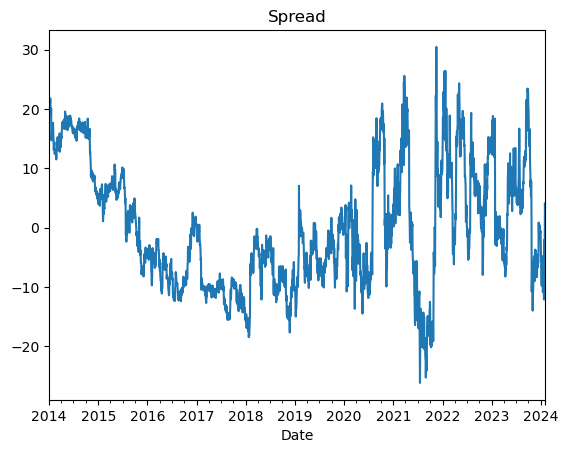

In [15]:
#Let's compute the spread
spread = Prix_mastercard - alpha - beta*Prix_visa
spread.plot()
plt.title('Spread')

In [16]:
#normalized spread
spread_norm = spread/spread.std()

In [33]:
spread_norm

Date
2014-01-01    2.007840
2014-01-02    2.067274
2014-01-03    2.028373
2014-01-06    2.045860
2014-01-07    2.074335
                ...   
2024-01-29   -0.993039
2024-01-30   -1.148717
2024-01-31   -0.082237
2024-02-01    0.398993
2024-02-02    0.343445
Length: 2633, dtype: float64

Text(0.5, 1.0, 'Normalized spread')

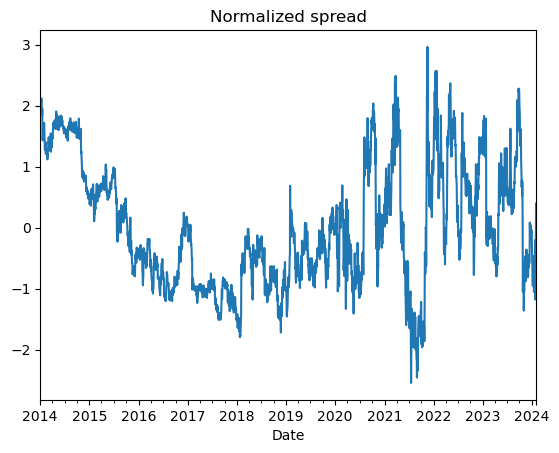

In [33]:
spread_norm.plot()
plt.title('Normalized spread')

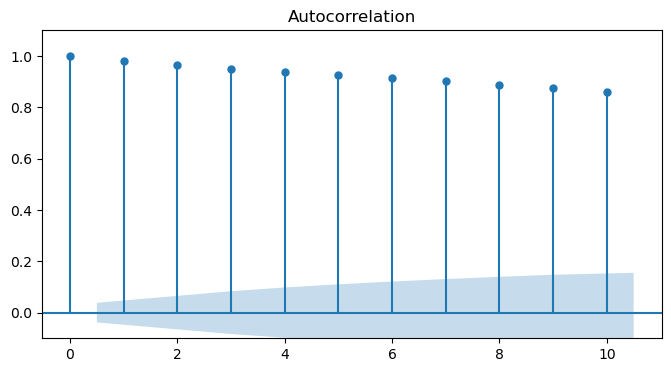

         lb_stat  lb_pvalue
1    2531.635914        0.0
2    4977.360926        0.0
3    7357.643654        0.0
4    9680.597651        0.0
5   11946.800794        0.0
6   14149.705893        0.0
7   16292.457924        0.0
8   18379.595623        0.0
9   20405.767241        0.0
10  22362.932593        0.0


(array([15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024')])

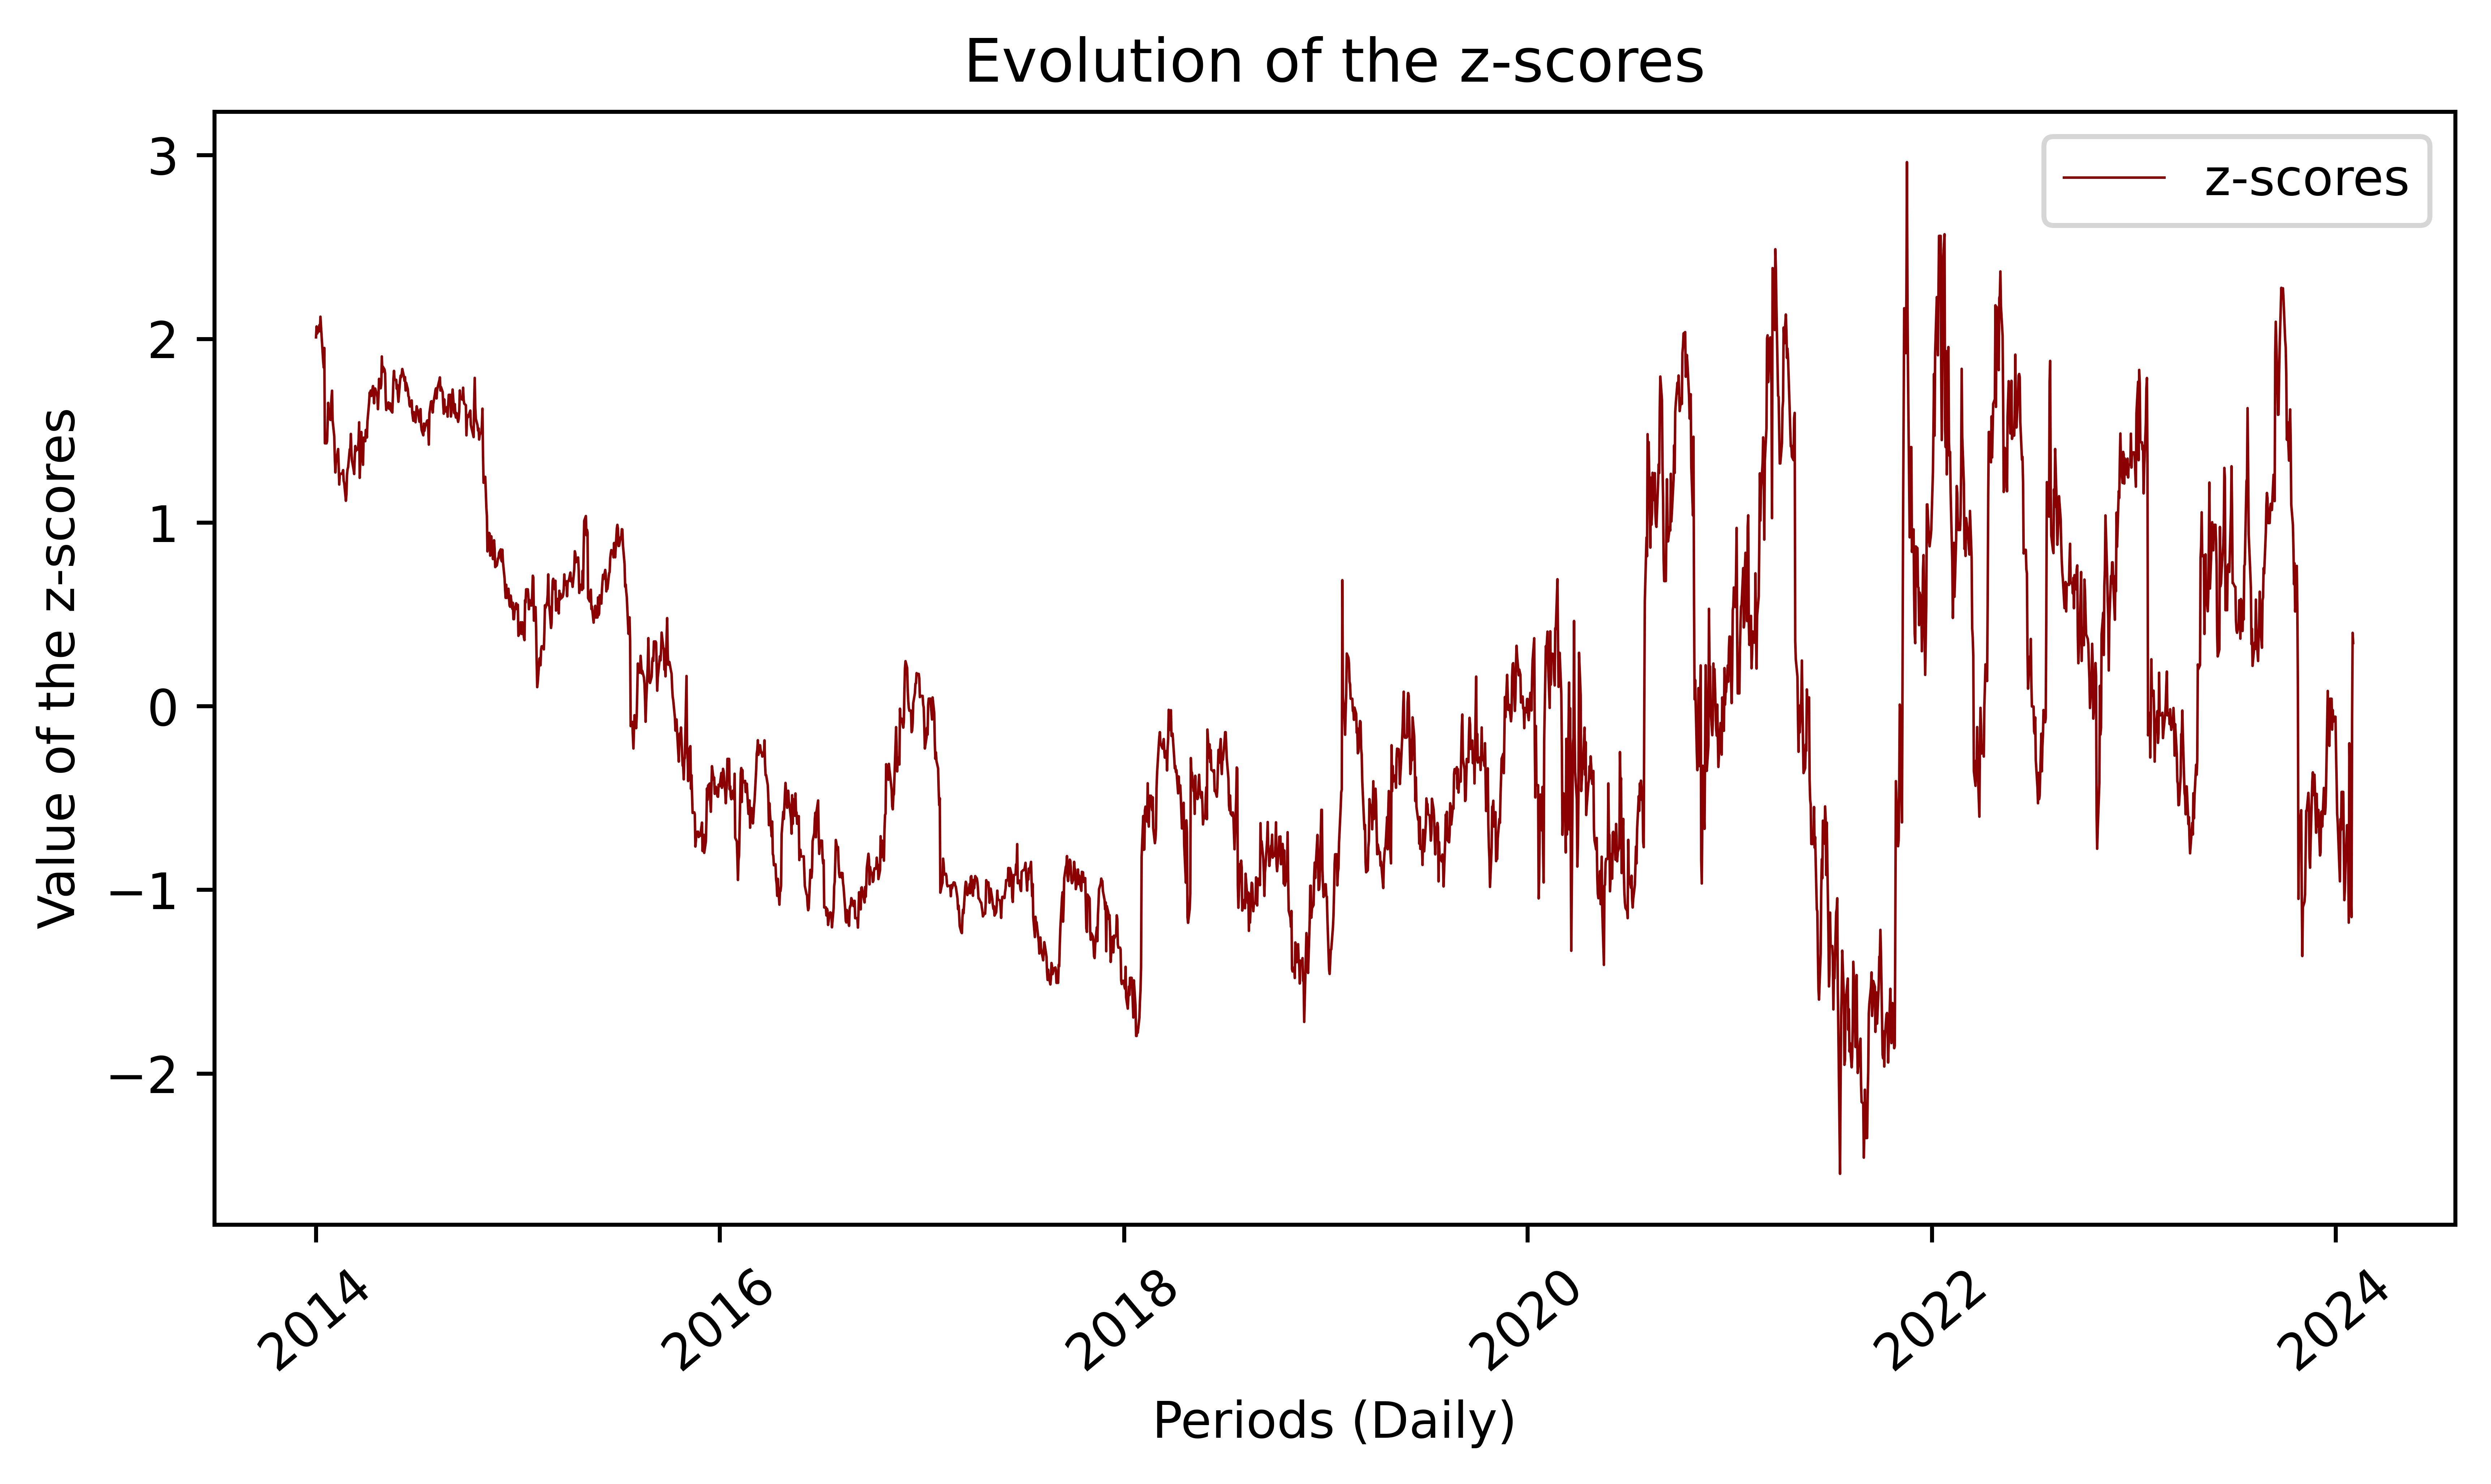

In [36]:
#Copy code from last project

fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(spread_norm, lags=10, ax=ax)
ax.set_ylim(-0.1, 1.1)
plt.show()

print(sm.stats.acorr_ljungbox(spread_norm, lags=10, return_df=True))
plt.figure(dpi = 1000, figsize=(8,4))
plt.plot(df.index, spread_norm, color = 'darkred', linewidth = 0.5)
plt.title('Evolution of the z-scores')
plt.xlabel('Periods (Daily)')
plt.ylabel('Value of the z-scores')
plt.legend(['z-scores'])
plt.xticks(rotation = 40)

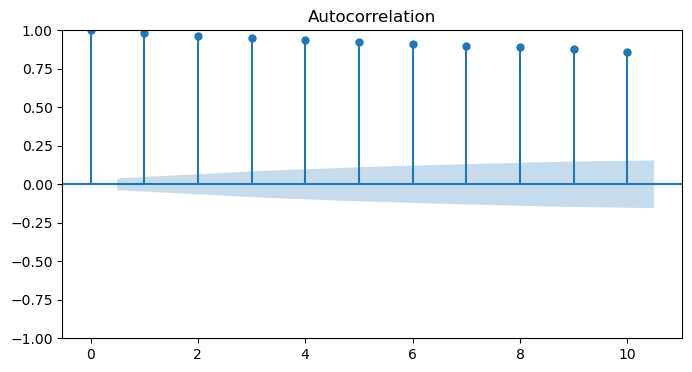

         lb_stat  lb_pvalue
10  22362.932593        0.0


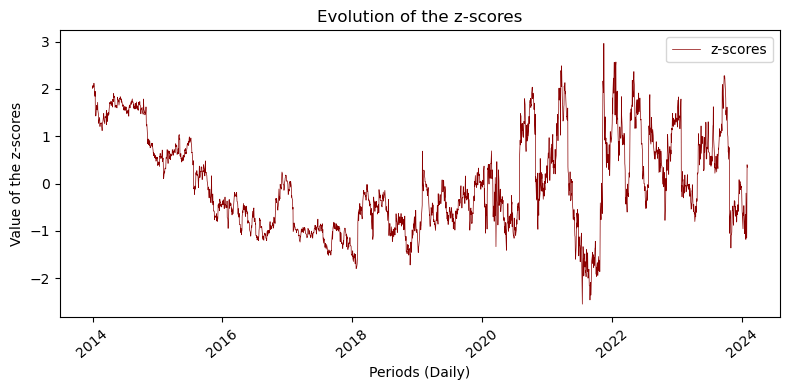

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# df = pd.read_csv('chemin_vers_votre_fichier.csv')

# Supposons que 'spread_norm' est la colonne de votre DataFrame qui contient le spread normalisé
# Et 'prices' contient les dates et les prix des actifs comme indice
#spread_norm = df['spread_norm']  # Remplacez 'spread_norm' par le nom de votre colonne de spread normalisé

# Tracer l'autocorrélation du spread normalisé
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(spread_norm, lags=10, ax=ax, alpha=0.05)
ax.set_ylim(-1, 1)  # L'autocorrélation peut varier de -1 à 1
plt.show()

# Effectuer le test de Ljung-Box sur le spread normalisé
ljung_box_results = acorr_ljungbox(spread_norm, lags=[10], return_df=True)
print(ljung_box_results)

# Tracer l'évolution des z-scores
plt.figure(figsize=(8, 4))
plt.plot(df.index, spread_norm, color='darkred', linewidth=0.5)
plt.title('Evolution of the z-scores')
plt.xlabel('Periods (Daily)')
plt.ylabel('Value of the z-scores')
plt.legend(['z-scores'])
plt.xticks(rotation=40)
plt.tight_layout()  # Ajuste automatiquement les sous-tracés pour qu'ils tiennent dans la figure
plt.show()


In [36]:
df

,MASTERCARD,GOLDMAN SACHS GP.,AMERICAN EXPRESS,MORGAN STANLEY,VISA
Date,,,,,
2014-01-01,83.5460,177.2600,90.73,31.36,55.6700
2014-01-02,83.4140,176.8900,89.45,31.03,55.2525
2014-01-03,83.0809,178.1500,89.74,31.51,55.2900
2014-01-06,82.6690,179.3700,89.70,31.62,54.9575
2014-01-07,83.7090,178.2900,89.36,31.52,55.3775
...,...,...,...,...,...
2024-01-29,440.5801,380.5601,200.86,87.62,273.6599
2024-01-30,445.1899,386.8701,204.15,87.62,277.1499
2024-01-31,449.2300,384.0100,200.74,87.24,273.2600


In [38]:
df['Asset_A'] = df['MASTERCARD']
df['Asset_B'] = df['VISA']

In [39]:
W0 = 1000           # Initial wealth
L = 2             # Maximum leverage allowed
z_in = 1.5# z_tilde threshold for making trades
z_tilde = spread_norm
alpha = alpha
beta = beta
# Initialize additional lists to track positions and leverage over time
positions_A_history = []
positions_B_history = []
leverage_A_history = []
leverage_B_history = []

# Reinitialize the tracking variables
positions = {'A': 0, 'B': 0}
wealth = W0
wealth_history = [W0]
trade_signals = []
leverage_used = []

# Rerun the main trading loop to include the tracking of positions and leverage
for i in range(1,len(df)-1):
    # Check trading signals
    if z_tilde[i] > z_in and positions['A'] == 0 and positions['B'] == 0:
        # Short A, Long B
        Q1 = (L * wealth) / df['Asset_A'].iloc[i]  
        positions['A'] -= Q1  # Short position for A
        positions['B'] += Q1 * beta  # Long position for B
        trade_signals.append(('Short A', 'Long B', df.index[i]))
      

    elif z_tilde[i] < -z_in and positions['A'] == 0 and positions['B'] == 0:
        # Long A, Short B
        Q2 = (L * wealth) / (beta*(df['Asset_B'].iloc[i] + L*(df['Asset_A'].iloc[i] - beta*df['Asset_B'].iloc[i]))) 
        positions['A'] += Q2   # Long position for A
        positions['B'] -= Q2*beta  # Short position for B
        trade_signals.append(('Long A', 'Short B', df.index[i]))


    # Update wealth for the day based on price changes
    if positions['A'] != 0:
        wealth += positions['A'] * (df['Asset_A'].iloc[i] - df['Asset_A'].iloc[i-1])
    if positions['B'] != 0:
        wealth += positions['B'] * (df['Asset_B'].iloc[i] - df['Asset_B'].iloc[i-1])
    wealth_history.append(wealth)

    # Close positions if z_tilde crosses zero
    if (positions['A'] < 0 and z_tilde[i] <= 0) or (positions['A'] > 0 and z_tilde[i] >= 0):
        positions['A'] = 0
        positions['B'] = 0
        trade_signals.append(('Close A', 'Close B', df.index[i]))
    # Update histories for plotting
    
    positions_A_history.append(positions['A'])
    positions_B_history.append(positions['B'])
    if positions['A'] != 0:
        leverage_A_history.append(positions['A'] * df['Asset_A'].iloc[i] / wealth)
    else:
        leverage_A_history.append(0)
    if positions['B'] != 0:
        leverage_B_history.append(positions['B'] * df['Asset_B'].iloc[i] / wealth)
    else:
        leverage_B_history.append(0)


In [45]:
def plot_financial_data(df, z_tilde, z_in, wealth_history, positions_A_history, positions_B_history, leverage_A_history, leverage_B_history):
    # Set up the plot area
    fig, axs = plt.subplots(4, 1, figsize=(14, 20))

    # Plot z_tilde signal
    axs[0].plot(df.index[0:len(z_tilde)+1], z_tilde, label='z_tilde', color='blue')
    axs[0].axhline(y=z_in, color='red', linestyle='--', label='Upper Threshold (z_in)')
    axs[0].axhline(y=-z_in, color='green', linestyle='--', label='Lower Threshold (-z_in)')
    axs[0].set_title('Signal z_tilde Over Time')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Signal Value')
    axs[0].legend()
    axs[0].grid(True)

    # Plot wealth history
    axs[1].plot(df.index[:len(wealth_history)], wealth_history, label='Wealth', color='orange', marker='o', linestyle='-', markersize=3)
    axs[1].set_title('Wealth Over Time')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Wealth in $')
    axs[1].legend()
    axs[1].grid(True)

    # Plot positions for both assets
    axs[2].plot(df.index[:len(positions_A_history)], positions_A_history, label='Position A', color='purple')
    axs[2].plot(df.index[:len(positions_B_history)], positions_B_history, label='Position B', color='brown')
    axs[2].set_title('Positions for Asset A and Asset B Over Time')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Positions')
    axs[2].legend()
    axs[2].grid(True)

    # Plot leverage for both assets
    axs[3].plot(df.index[:len(leverage_A_history)], leverage_A_history, label='Leverage A', color='pink')
    axs[3].plot(df.index[:len(leverage_B_history)], leverage_B_history, label='Leverage B', color='cyan')
    axs[3].set_title('Leverage for Asset A and Asset B Over Time')
    axs[3].set_xlabel('Date')
    axs[3].set_ylabel('Leverage')
    axs[3].legend()
    axs[3].grid(True)

    # Set date formatting for all subplots
    for ax in axs:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        ax.tick_params(axis='x', rotation=45)

    # Show the plots
    plt.tight_layout()
    return fig


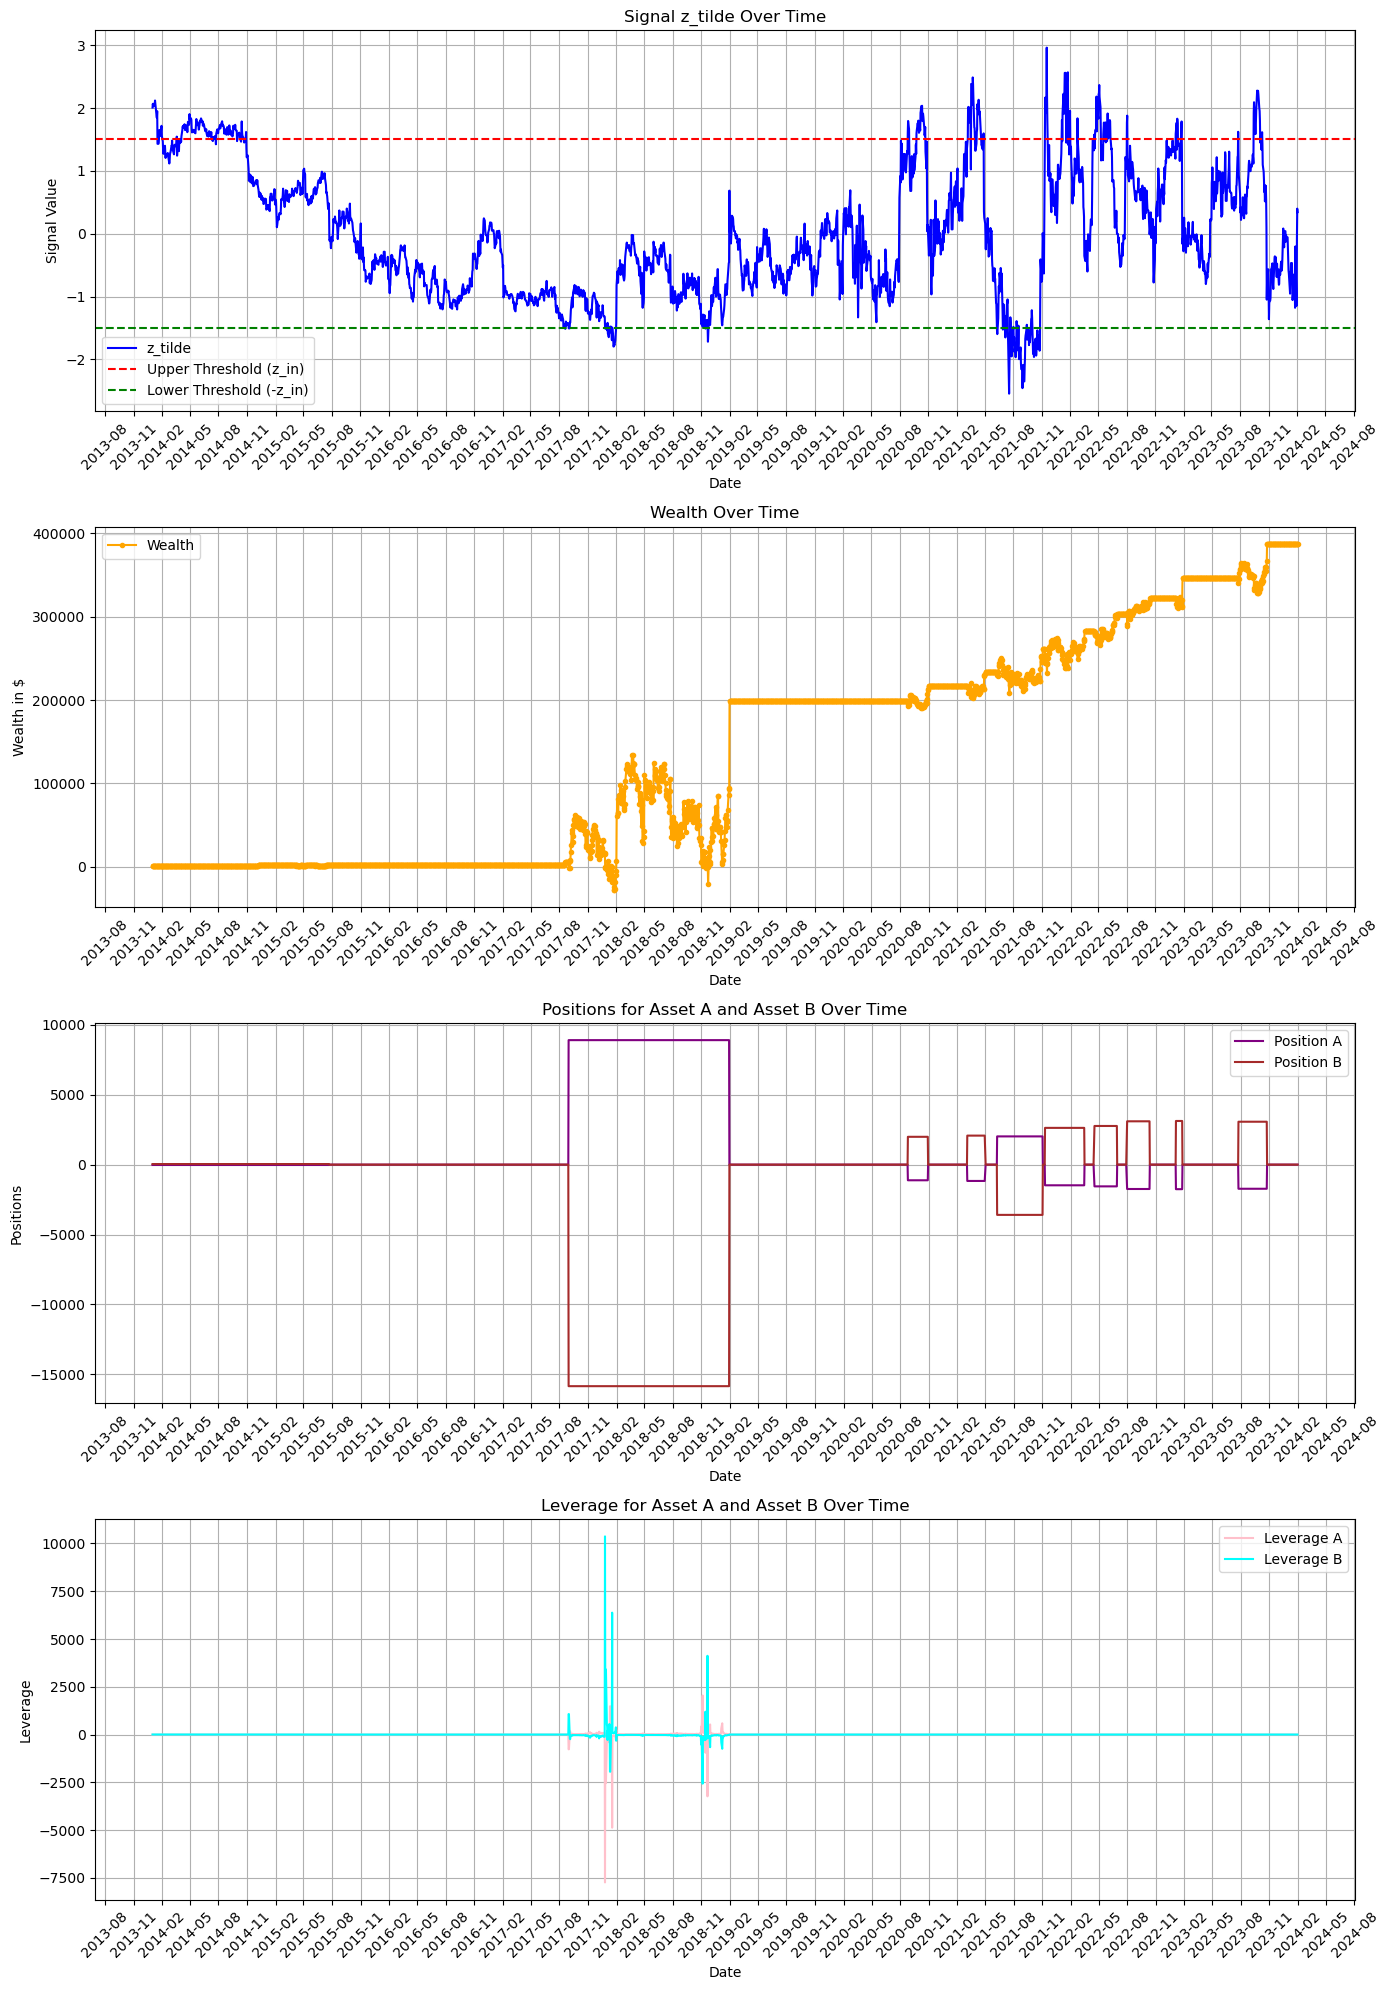

In [47]:
import matplotlib.dates as mdates

# Execute the plotting function
plot_fig = plot_financial_data(df, z_tilde, z_in, wealth_history, positions_A_history, positions_B_history, leverage_A_history, leverage_B_history)

# Display the plots
plt.show()


In [48]:
# Display final metrics
final_wealth = wealth_history[-1]
max_wealth = max(wealth_history)
min_wealth = min(wealth_history)
number_of_trades = len(trade_signals)
max_leverage_A = max(leverage_A_history, default=0)
max_leverage_B = max(leverage_B_history, default=0)

print(f"Final wealth: ${final_wealth:.2f}")
print(f"Maximum wealth: ${max_wealth:.2f}")
print(f"Minimum wealth: ${min_wealth:.2f}")
print(f"Number of trades: {number_of_trades}")
print(f"Maximum leverage used for A: {max_leverage_A:.2f}")
print(f"Maximum leverage used for B: {max_leverage_B:.2f}")


Final wealth: $387526.32
Maximum wealth: $387526.32
Minimum wealth: $-28008.84
Number of trades: 22
Maximum leverage used for A: 2041.82
Maximum leverage used for B: 10370.94


In [52]:
df1

,MASTERCARD (#T) - MASTERCARD (#T),GOLDMAN SACHS GP. (#T) - GOLDMAN SACHS GP. (#T),AMERICAN EXPRESS (#T) - AMERICAN EXPRESS (#T),MORGAN STANLEY (#T) - MORGAN STANLEY (#T),VISA 'A' (#T) - VISA 'A' (#T)
Name,,,,,
2014-01-02,83.4140,176.8900,89.45,31.03,55.2525
2014-01-03,83.0809,178.1500,89.74,31.51,55.2900
2014-01-06,82.6690,179.3700,89.70,31.62,54.9575
2014-01-07,83.7090,178.2900,89.36,31.52,55.3775
2014-01-08,83.6840,178.4400,89.41,31.56,55.5550
...,...,...,...,...,...
2024-01-29,440.5801,380.5601,200.86,87.62,273.6599
2024-01-30,445.1899,386.8701,204.15,87.62,277.1499
2024-01-31,449.2300,384.0100,200.74,87.24,273.2600


In [19]:
Mastercard = df['MASTERCARD']
Visa = df['VISA']
z_s = spread_norm

In [20]:
n = len(Mastercard)
time = np.arange(n+1)
W = np.zeros(n+1)
W[0]=1000
p_a = np.zeros(n+1)
p_b = np.zeros(n+1)
p_a[1:]=df['MASTERCARD']
p_b[1:]=df['VISA']
z_list= np.insert(z_s.values,0,0)
x_a=np.zeros(n+1)
x_b=np.zeros(n+1)
X = np.zeros(n+1) #position
margin = 0.5
L= 1/margin
z_in = 1.5
z_high = 0
z_s = spread_norm